In [2]:
import s3fs
import zarr

url = "s3://hrrrzarr"
fs = s3fs.S3FileSystem(anon=True)
store = zarr.open(s3fs.S3Map(url, s3=fs))

In [3]:
temperature = store["sfc/20200801/20200801_00z_anl.zarr/1000mb/TMP/1000mb/TMP"]
index = store["grid/HRRR_chunk_index.zarr"]

/Users/rhawthorne/miniconda3/envs/metpy_v1/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/rhawthorne/miniconda3/envs/metpy_v1/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/rhawthorne/miniconda3/envs/metpy_v1/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


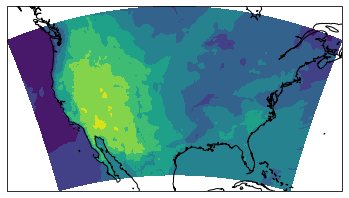

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mercator())
ax.contourf(index["longitude"], index["latitude"], temperature, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()